In [25]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pylab as plt
import seaborn as sns
from aggregatedata import ForecastDataset, LabeledData, REG_ENG, CsvMissingError
from machine import BulletinMachine

# sns.set_style('dark')
plt.style.use('dark_background')

In [2]:
# ubm = BulletinMachine.load("demo")

In [3]:
# predicted_data = ubm.predict(testing_data)

In [4]:
days = 7
regobs_types = list(REG_ENG.keys())
labeled_data = None
try:
    print("Reading csv")
    labeled_data = LabeledData.from_csv(days=days, regobs_types=regobs_types)
except CsvMissingError:
    print("Csv missing. Fetching online data. (This takes a long time.)")
    labeled_data = ForecastDataset(regobs_types=regobs_types).label(days=days)
    labeled_data.to_csv()

Reading csv


Just extract the column with the danger_level.

In [5]:
# Data for region with ID=3007 only
labeled_data.label.CLASS.xs(3007, level=1)

\
           danger_level       emergency_warning   problem_1   problem_2   
2017-12-08            3               Ikke gitt  drift-slab    pwl-slab   
2017-12-09            2               Ikke gitt  drift-slab    pwl-slab   
2017-12-10            2               Ikke gitt    pwl-slab  drift-slab   
2017-12-11            2               Ikke gitt    pwl-slab  drift-slab   
2017-12-12            2               Ikke gitt    pwl-slab               
...                 ...                     ...         ...         ...   
2020-05-27            2               Ikke gitt   wet-loose    pwl-slab   
2020-05-28            2               Ikke gitt   wet-loose    pwl-slab   
2020-05-29            2               Ikke gitt   wet-loose    wet-slab   
2020-05-30            2               Ikke gitt    wet-slab   wet-loose   
2020-05-31            3  Naturlig utløste skred    wet-slab   wet-loose   

                                    drift-slab                      ...  \
           problem_3 problem_amount      cause dist dsize lev_fill  ...   
2017-12-08                        2   new-snow    2     2        1  ...   
2017-12-09                        2  snowdrift    2     2        1  ...   
2017-12-10                        2  snowdrift    2     2        1  ...   
2017-12-11                        2  snowdrift    2     2        1  ...   
2017-12-12                        1          0    0     0        0  ...   
...              ...            ...        ...  ...   ...      ...  ...   
2020-05-27     glide              3          0    0     0        0  ...   
2020-05-28     glide              3          0    0     0        0  ...   
2020-05-29                        2          0    0     0        0  ...   
2020-05-30                        2          0    0     0        0  ...   
2020-05-31                        2          0    0     0        0  ...   

           wet-loose                         wet-slab                      \
               dsize lev_fill prob trig         cause dist dsize lev_fill   
2017-12-08         0        0    0    0             0    0     0        0   
2017-12-09         0        0    0    0             0    0     0        0   
2017-12-10         0        0    0    0             0    0     0        0   
2017-12-11         0        0    0    0             0    0     0        0   
2017-12-12         0        0    0    0             0    0     0        0   
...              ...      ...  ...  ...           ...  ...   ...      ...   
2020-05-27         2        1    3   22             0    0     0        0   
2020-05-28         2        2    3   21             0    0     0        0   
2020-05-29         2        2    3   22  water-layers    1     3        4   
2020-05-30         2        1    3   21  water-layers    1     3        1   
2020-05-31         2        1    3   22  water-layers    2     3        1   

                      
           prob trig  
2017-12-08    0    0  
2017-12-09    0    0  
2017-12-10    0    0  
2017-12-11    0    0  
2017-12-12    0    0  
...         ...  ...  
2020-05-27    0    0  
2020-05-28    0    0  
2020-05-29    3   22  
2020-05-30    3   22  
2020-05-31    3   22  

[526 rows x 48 columns]

In [6]:
#or
labeled_data.label.CLASS.loc[(slice(None), 3007), :]

\
                danger_level       emergency_warning   problem_1   problem_2   
2017-12-08 3007            3               Ikke gitt  drift-slab    pwl-slab   
2017-12-09 3007            2               Ikke gitt  drift-slab    pwl-slab   
2017-12-10 3007            2               Ikke gitt    pwl-slab  drift-slab   
2017-12-11 3007            2               Ikke gitt    pwl-slab  drift-slab   
2017-12-12 3007            2               Ikke gitt    pwl-slab               
...                      ...                     ...         ...         ...   
2020-05-27 3007            2               Ikke gitt   wet-loose    pwl-slab   
2020-05-28 3007            2               Ikke gitt   wet-loose    pwl-slab   
2020-05-29 3007            2               Ikke gitt   wet-loose    wet-slab   
2020-05-30 3007            2               Ikke gitt    wet-slab   wet-loose   
2020-05-31 3007            3  Naturlig utløste skred    wet-slab   wet-loose   

                                         drift-slab                      ...  \
                problem_3 problem_amount      cause dist dsize lev_fill  ...   
2017-12-08 3007                        2   new-snow    2     2        1  ...   
2017-12-09 3007                        2  snowdrift    2     2        1  ...   
2017-12-10 3007                        2  snowdrift    2     2        1  ...   
2017-12-11 3007                        2  snowdrift    2     2        1  ...   
2017-12-12 3007                        1          0    0     0        0  ...   
...                   ...            ...        ...  ...   ...      ...  ...   
2020-05-27 3007     glide              3          0    0     0        0  ...   
2020-05-28 3007     glide              3          0    0     0        0  ...   
2020-05-29 3007                        2          0    0     0        0  ...   
2020-05-30 3007                        2          0    0     0        0  ...   
2020-05-31 3007                        2          0    0     0        0  ...   

                wet-loose                         wet-slab             \
                    dsize lev_fill prob trig         cause dist dsize   
2017-12-08 3007         0        0    0    0             0    0     0   
2017-12-09 3007         0        0    0    0             0    0     0   
2017-12-10 3007         0        0    0    0             0    0     0   
2017-12-11 3007         0        0    0    0             0    0     0   
2017-12-12 3007         0        0    0    0             0    0     0   
...                   ...      ...  ...  ...           ...  ...   ...   
2020-05-27 3007         2        1    3   22             0    0     0   
2020-05-28 3007         2        2    3   21             0    0     0   
2020-05-29 3007         2        2    3   22  water-layers    1     3   
2020-05-30 3007         2        1    3   21  water-layers    1     3   
2020-05-31 3007         2        1    3   22  water-layers    2     3   

                                    
                lev_fill prob trig  
2017-12-08 3007        0    0    0  
2017-12-09 3007        0    0    0  
2017-12-10 3007        0    0    0  
2017-12-11 3007        0    0    0  
2017-12-12 3007        0    0    0  
...                  ...  ...  ...  
2020-05-27 3007        0    0    0  
2020-05-28 3007        0    0    0  
2020-05-29 3007        4    3   22  
2020-05-30 3007        1    3   22  
2020-05-31 3007        1    3   22  

[526 rows x 48 columns]

In [7]:
# Data for a given date:
labeled_data.label.CLASS.xs('2020-05-23', level=0)

\
     danger_level       emergency_warning  problem_1  problem_2 problem_3   
3003            2               Ikke gitt   new-slab   pwl-slab             
3007            3  Naturlig utløste skred  wet-loose   wet-slab     glide   
3009            3  Naturlig utløste skred  wet-loose   wet-slab     glide   
3010            3  Naturlig utløste skred  wet-loose   pwl-slab     glide   
3011            3  Naturlig utløste skred  wet-loose   pwl-slab     glide   
3012            3  Naturlig utløste skred  wet-loose      glide  pwl-slab   
3013            3  Naturlig utløste skred  wet-loose      glide  pwl-slab   
3014            3  Naturlig utløste skred  wet-loose   pwl-slab     glide   
3015            3  Naturlig utløste skred   pwl-slab  wet-loose     glide   
3016            3  Naturlig utløste skred   pwl-slab  wet-loose     glide   
3017            3  Naturlig utløste skred   pwl-slab  wet-loose     glide   
3022            2               Ikke gitt  wet-loose      glide             
3023            2               Ikke gitt  wet-loose      glide             
3024            2               Ikke gitt  wet-loose      glide             
3027            2               Ikke gitt  wet-loose      glide             
3028            2               Ikke gitt   wet-slab  wet-loose             
3029            2               Ikke gitt  wet-loose   wet-slab             
3031            2               Ikke gitt  wet-loose      glide             
3032            2               Ikke gitt  wet-loose   wet-slab             
3034            2               Ikke gitt  wet-loose      glide             
3035            2               Ikke gitt  wet-loose   wet-slab             
3037            2               Ikke gitt  wet-loose      glide             
3006            3               Ikke gitt  wet-loose      glide             

                    drift-slab                      ... wet-loose           \
     problem_amount      cause dist dsize lev_fill  ...     dsize lev_fill   
3003              2          0    0     0        0  ...         0        0   
3007              3          0    0     0        0  ...         2        1   
3009              3          0    0     0        0  ...         2        1   
3010              3          0    0     0        0  ...         2        1   
3011              3          0    0     0        0  ...         2        1   
3012              3          0    0     0        0  ...         2        1   
3013              3          0    0     0        0  ...         2        1   
3014              3          0    0     0        0  ...         2        1   
3015              3          0    0     0        0  ...         2        1   
3016              3          0    0     0        0  ...         2        1   
3017              3          0    0     0        0  ...         2        1   
3022              2          0    0     0        0  ...         2        2   
3023              2          0    0     0        0  ...         2        2   
3024              2          0    0     0        0  ...         2        2   
3027              2          0    0     0        0  ...         2        2   
3028              2          0    0     0        0  ...         2        1   
3029              2          0    0     0        0  ...         2        2   
3031              2          0    0     0        0  ...         2        2   
3032              2          0    0     0        0  ...         2        1   
3034              2          0    0     0        0  ...         2        2   
3035              2          0    0     0        0  ...         2        1   
3037              2          0    0     0        0  ...         2        2   
3006              2          0    0     0        0  ...         2        1   

                         wet-slab                                
     prob trig              cause dist dsize lev_fill prob trig  
3003    0    0                  0    0     0        0    0    0  


In [8]:
# Data for only one column, e.g. "danger_level"
labeled_data.label.CLASS[('','danger_level')]


2017-12-08  3003    2
            3007    3
            3009    3
            3010    3
            3011    3
                   ..
2020-05-31  3015    3
            3016    3
            3017    3
            3022    3
            3023    3
Name: (, danger_level), Length: 11366, dtype: object

In [9]:
# or, e.g. "drift-slab" and "cause"
labeled_data.label.CLASS[('drift-slab','cause')]

2017-12-08  3003    new-snow
            3007    new-snow
            3009    new-snow
            3010    new-snow
            3011    new-snow
                      ...   
2020-05-31  3015           0
            3016           0
            3017           0
            3022           0
            3023           0
Name: (drift-slab, cause), Length: 11366, dtype: object

In [10]:
labeled_data.label.CLASS[('drift-slab','cause')].unique()


array(['new-snow', 'snowdrift', '0', 'crust'], dtype=object)

In [11]:
labeled_data.data['precip']['0']

2017-12-08  3003    2.0
            3007    2.0
            3009    5.0
            3010    3.0
            3011    2.0
                   ... 
2020-05-31  3015    0.0
            3016    0.0
            3017    0.0
            3022    0.0
            3023    0.0
Name: 0, Length: 11366, dtype: float64

In [12]:
X = labeled_data.data.to_numpy()

In [13]:
y = labeled_data.label.CLASS[('','danger_level')].to_numpy()

## Training some simple models

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_predict
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score

In [15]:
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.7, random_state=14)
sss_i = sss.get_n_splits(X, y)

skf = StratifiedKFold(n_splits=4, random_state=14)
skf.get_n_splits(X, y)

sss_i

C:\ProgramData\Anaconda3\envs\scientific\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


4

TRAIN: [4948 4779 5501 ... 8573 6313 3490] TEST: [11144  6118  7685 ...  9218   765  8571]
TRAIN: [6751 8465 2569 ... 5090 8938 5662] TEST: [ 761 7070 1911 ... 2991  827 4665]
TRAIN: [1994 4291 6855 ... 2136 4617 5381] TEST: [6817 8411 6386 ... 8611 5683 2147]
TRAIN: [6163 5551 6813 ... 5900 1273  885] TEST: [6568 6666 6271 ...  839  736 4574]


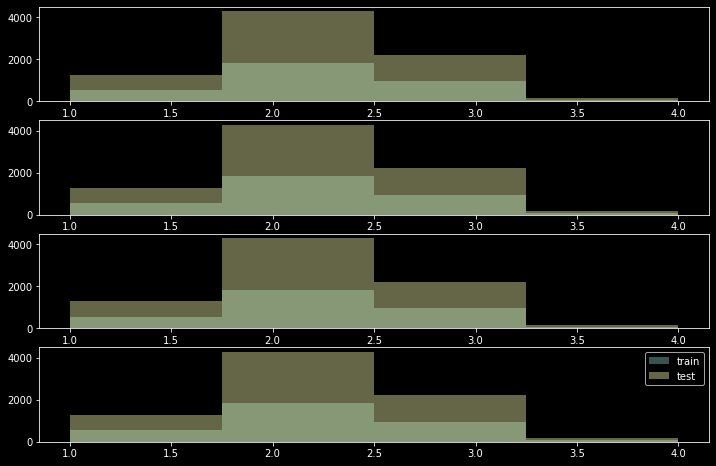

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 8))
i = 0
for train_index, test_index in sss.split(X, y):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     sns.distplot(y_train, bins=4, kde=False, label='train', ax=ax[i])
     sns.distplot(y_test, bins=4, kde=False, label='test', ax=ax[i])
     plt.legend()
     i += 1

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MSE:  0.23966318964433833
[[ 549    0    0    0]
 [   0 1836    0    0]
 [   0    0  953    0]
 [   0    0    0   71]]
[[ 903  377    0    0]
 [ 109 4062  115    0]
 [   5 1028 1192    0]
 [   0   31  134    1]]
Precision (test):  [0.8879056  0.73881411 0.82720333 1.        ]
Precision (train):  [1. 1. 1. 1.]
Recall (test):  [0.70546875 0.94773682 0.53573034 0.0060241 ]
Recall (train):  [1. 1. 1. 1.]
F1 (test):  [0.78624293 0.83033524 0.65030005 0.01197605]
F1 (train):  [1. 1. 1. 1.]
Normalized confusion matrix
Normalized confusion matrix
MSE:  0.2416739977378409
[[ 549    0    0    0]
 [   0 1836    0    0]
 [   0    0  953    0]
 [   0    0    0   71]]
[[ 899  381    0    0]
 [ 104 4062  120    0]
 [   8 1034 1183    0]
 [   0   29  136    1]]
Precision (test):  [0.8892186  0.73774065 0.82209868 1.        ]
Precision (train):  [1. 1. 1. 1.]
Recall (test):  [0.70234375 0.94773682 0.53168539 0.0060241 ]
Recall (train):  [1. 1. 1. 1.]
F1 (test):  [0.78481013 0.82965686 0.64574236 0.0119

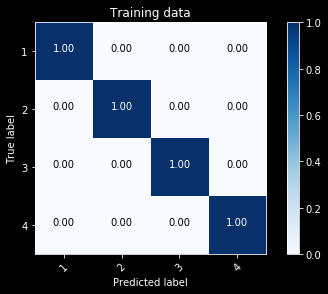

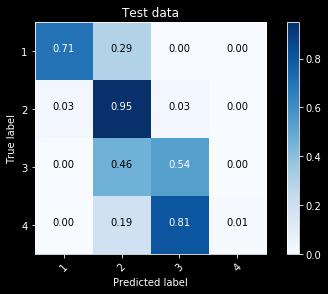

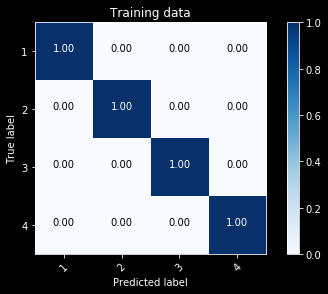

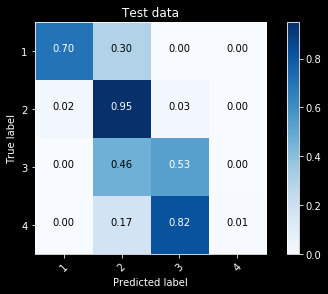

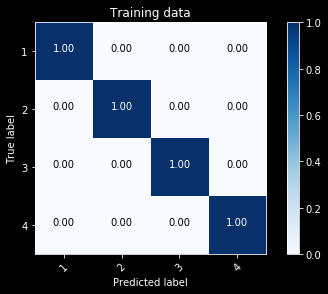

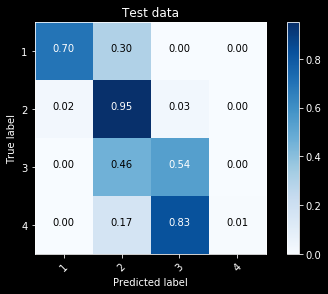

C:\ProgramData\Anaconda3\envs\scientific\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\scientific\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\scientific\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


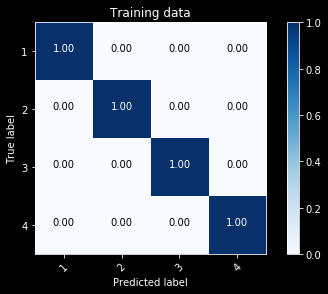

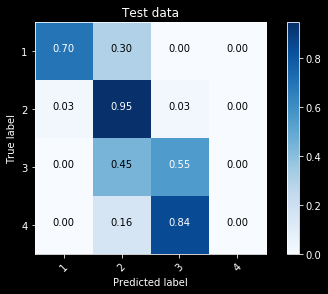

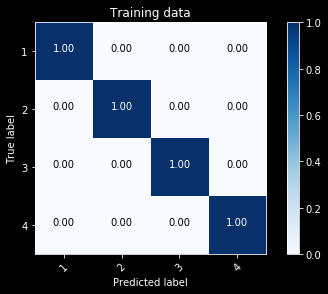

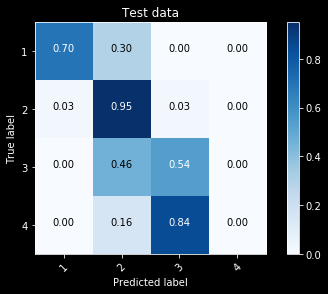

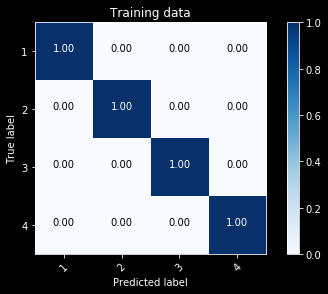

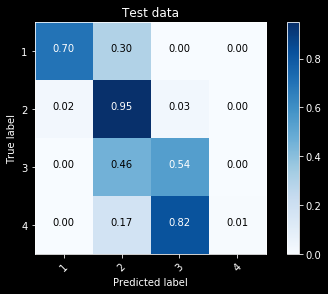

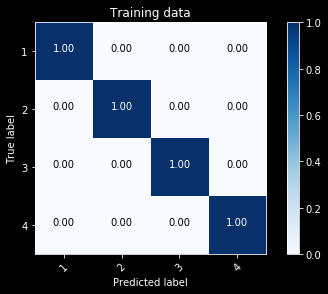

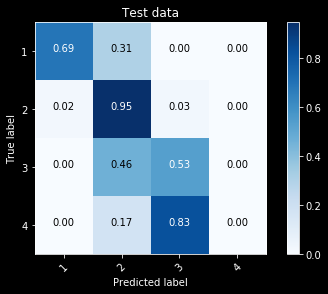

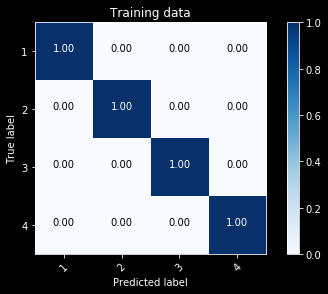

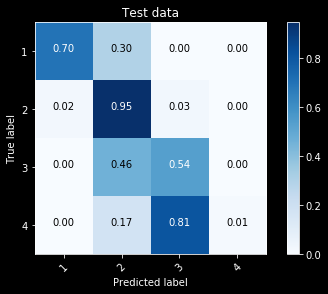

In [36]:
%%timeit

clf_params = {
    'min_samples_split': 2,
    'class_weight': 'balanced',
    'n_estimators': 500
}
# clf = DecisionTreeClassifier(**clf_params)
clf = RandomForestClassifier(**clf_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

pre_test = precision_score(y_test, y_pred, labels=['1', '2', '3', '4'], average=None)
pre_train = precision_score(y_train, y_pred_train, average=None)

rec_test = recall_score(y_test, y_pred, average=None)
rec_train = recall_score(y_train, y_pred_train, average=None)

f1_test = f1_score(y_test, y_pred, average=None)
f1_train = f1_score(y_train, y_pred_train, average=None)

print('Precision (test): ', pre_test)
print('Precision (train): ', pre_train)
print('Recall (test): ', rec_test)
print('Recall (train): ', rec_train)
print('F1 (test): ', f1_test)
print('F1 (train): ', f1_train)

plot_confusion_matrix(cm_train, classes=['1', '2', '3', '4'], normalize=True, title='Training data')
plt.figure()
plot_confusion_matrix(cm_test, classes=['1', '2', '3', '4'], normalize=True, title='Test data')
plt.show()

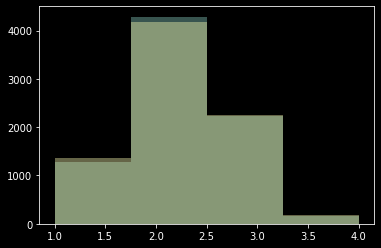

In [19]:
sns.distplot(y_test, bins=4, kde=False)
sns.distplot(y_pred, bins=4, kde=False)

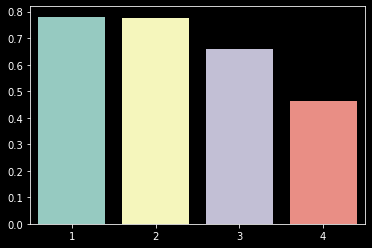

In [20]:
sns.barplot([1,2,3,4], f1_test)
# sns.barplot([1,2,3,4], f1_train)


In [21]:
# plt.bar([[1,2,3,4], [1,2,3,4]], [f1_test, f1_train])
# plt.bar([1,2,3,4], f1_train)

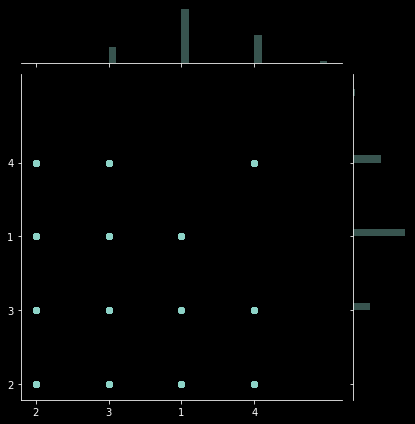

In [22]:
sns.jointplot(x=y_test, y=y_pred)